<a href="https://colab.research.google.com/github/mathgds/heart_attack_analysis_project/blob/main/final_project_data_science_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Análise de dados por meio de classificação de pacientes com risco de ataque cardíaco

Universidade Federal de Pernambuco | Centro de Tecnologia e Geociências - CTG

Departamento de Engenharia Mecânica - DEMEC | Tópicos Especiais em Projetos 4

**Aluno:** Matheus Gomes da Silva

**Professor:** Francisco Fernando Roberto Pereira

Recife, 06 de Outubro de 2024

## 1. Definição do Problema

O presente notebook apresenta um algoritmo para prever a possibilidade de ataques cardíacos, em função de atributos dos pacientes, apresentados abaixo. O modelo de classificação retornará valores binários, onde 0 representa baixa chance de infarto, e 1 representa alto chance de infarto. O banco de dados foi retirado da plataforma Kaggle e é de autoria de Rashik Rahman. O uso pelo autor do notebook será para fins educacionais, durante a disciplina de Tópicos Especiais em Energia 4, voltado para a análise de dados utilizando linguagem python com auxílio de ferramentas de inteligência artificial.

O banco de dados pode ser acessado através do link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data


**Informações sobre os atributos:**
1. **Age** - Idade do paciente;
2. **Sex** - Sexo do paciente (0 = feminino, 1 = masculino);
3. **Ex_Angina** - Angina¹ induzida por exercício (0 = não, 1 = sim);
4. **Nb_CA** - Número de artérias coronárias (coronary arteries, em inglês) que fornecem sangue ao coração (0 a 3);
5. **Type_CP** - Tipo de dor torácica (chest pain, em inglês)
  * 1 = Angina típica
  * 2 = Angina atípica
  * 3 = Dor não anginosa
  * 4 = Assintomático
6. **RBP** - Pressão arterial em repouso, (resting blood pressure, em inglês) (dados em mm Hg);
7. **Chol** - Colesterol em mg/dl obtido via sensor de IMC;
8. **FBS** - Glicemia de jejum (fasting blood sugar, em inglês) > 120 mg/dl (1 = verdadeiro; 0 = falso);
9. **Results_Ecg** - Resultados do Eletrocardiograma em repouso
 * 0 = Normal
 * 1 = Com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
 * 2 = Mostrando hipertrofia ventricular esquerda provável ou definitiva de acordo com os critérios de Estes
10. **Max_Freq (Frequência cardíaca máxima alcançada)** - Frequência cardíaca máxima alcançada
11. **oldpeak** - Depressão do segmento ST induzida por exercício em relação ao repouso.
12. **slp (A inclinação do segmento ST durante o exercício)** - ST: leitura que representa o intervalo entre a despolarização dos ventrículos (quando eles se contraem) e a repolarização (quando eles se relaxam).
  * 0: Descendente
  * 1: Plana
  * 2: Ascendente
13. **thal** - Condição de talassemia (doença hereditária do sangue que afeta a produção de hemoglobina)
14. **Alvo:**
 * 0 = Menor chance de ataque cardíaco
 * 1 = Maior chance de ataque cardíaco


¹ Angina é uma condição que causa dor ou desconforto no peito devido à diminuição do fluxo sanguíneo para o músculo cardíaco. Isso geralmente ocorre porque as artérias coronárias, que fornecem sangue ao coração, estão estreitas ou bloqueadas. A angina é frequentemente descrita como uma sensação de pressão, aperto ou dor no peito, e pode irradiar para o braço, pescoço, mandíbula ou costas. Ela pode ser desencadeada por esforço físico, estresse emocional ou outras condições que aumentam a demanda de oxigênio pelo coração.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Definição do Dados

Através da plataforma Kaggle, obteu-se o arquivo .csv com o dataset desejado. O mesmo será carregado no repositório do Github do projeto e utilizado como banco de dados para as funções a seguir. O script abaixo informa o link de onde o arquivo está localizado, e em seguida é categorizado em colunas, de acordo com os parâmetros exibidos no primeiro tópico. A função "dataset.head()" demonstra a tabela de acordo com os dados estabelecidos como uma forma de visualizar se os dados foram importados corretamente.

In [4]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/mathgds/heart_attack_analisys/refs/heads/main/heart.csv"

# Informa o cabeçalho das colunas
colunas = ['Age', 'Sex', 'Type_CP', 'RBP', 'Chol', 'FBS', 'Results_Ecg', 'Max_Freq', 'Ex_Angina', 'oldpeak', 'slp', 'Nb_CA','thall','output']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [5]:
dataset.head()

,Age,Sex,Type_CP,RBP,Chol,FBS,Results_Ecg,Max_Freq,Ex_Angina,oldpeak,slp,Nb_CA,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

As linhas de código a seguir informam características do conjunto de dados a ser analisado, como tamanho da matriz, tipo de variável, quantidade de uso de memória, etc.

In [6]:
# Mostra as dimensões do dataset
print(dataset.shape)

(303, 14)


In [7]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          303 non-null    int64  
 1   Sex          303 non-null    int64  
 2   Type_CP      303 non-null    int64  
 3   RBP          303 non-null    int64  
 4   Chol         303 non-null    int64  
 5   FBS          303 non-null    int64  
 6   Results_Ecg  303 non-null    int64  
 7   Max_Freq     303 non-null    int64  
 8   Ex_Angina    303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slp          303 non-null    int64  
 11  Nb_CA        303 non-null    int64  
 12  thall        303 non-null    int64  
 13  output       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


### 3.2 Selecionando as "features" e a Variável Alvo

Neste tópico iremos categorizar o conjunto de dados para que o restante do programa interprete a influência das variáveis de entrada, em relação à variável de saída, para isto, dividiu-se os dados em valores de treino e teste, e em seguida, verifica-se os valores máximo e mínimo para cada coluna do conjunto, de modo a verificar a variação nos valores de cada parâmetro.

In [8]:
# Selecionando as features e a variável alvo
X = dataset[['Age', 'Sex', 'Type_CP', 'RBP', 'Chol', 'FBS', 'Results_Ecg', 'Max_Freq', 'Ex_Angina', 'oldpeak', 'slp', 'Nb_CA','thall']]
y = dataset['output']

In [9]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
min_values = dataset.min()

# Exibe o valor máximo de cada coluna
max_values = dataset.max()

# Exibe os mínimos e máximos de todas as colunas
print("Mínimos de cada coluna:\n", min_values)
print("\nMáximos de cada coluna:\n", max_values)

Mínimos de cada coluna:
 Age             29.0
Sex              0.0
Type_CP          0.0
RBP             94.0
Chol           126.0
FBS              0.0
Results_Ecg      0.0
Max_Freq        71.0
Ex_Angina        0.0
oldpeak          0.0
slp              0.0
Nb_CA            0.0
thall            0.0
output           0.0
dtype: float64

Máximos de cada coluna:
 Age             77.0
Sex              1.0
Type_CP          3.0
RBP            200.0
Chol           564.0
FBS              1.0
Results_Ecg      2.0
Max_Freq       202.0
Ex_Angina        1.0
oldpeak          6.2
slp              2.0
Nb_CA            4.0
thall            3.0
output           1.0
dtype: float64


### 3.3 Criação de um Pipeline de Pré-Processamento
A criação de um pipeline de pré-processamento é necessária ao analisar a variação entre os valores máximos e mínimos anteriormente, de modo à garantir que os dados estejam devidamente preparados para serem alimentados no modelo de classificação. Algumas das vantagens de executar este procedimento são:
* Automatizar o pré-processamento.

* Garante que todas as etapas sejam aplicadas de maneira consistente nos dados de treino e teste.

* Facilita a experimentação de diferentes modelos e estratégias de pré-processamento sem precisar reescrever muito código.

####**I. Escalonamento (normalização/padronização):**

Colunas afetadas: Age, RBP, Chol, Max_Freq, oldpeak.

Essas colunas possuem diferentes escalas e variações. Para evitar que os modelos de machine learning sejam influenciados por essas diferenças, é uma boa prática escaloná-las.

####**II. Variáveis categóricas**

Colunas afetadas: Sex, Type_CP, Results_Ecg, Ex_Angina, slp, Nb_CA, thall.

Essas colunas são categóricas, e os modelos de machine learning precisam que os dados estejam em um formato numérico adequado.

*OBS.:* Tratamento de valores nulos: Devemos nos certificar de que as colunas não tenham valores nulos. O mínimo de Nb_CA e thall sendo 0 pode ser um valor legítimo ou pode indicar um dado ausente. Como neste caso estes valores são significativos, estas duas variáveis não serão selecionadas para o processo.

####**III. Transformação de variáveis:**

Colunas afetadas: oldpeak.

Pode ser útil transformar algumas variáveis, como oldpeak, que varia de 0.0 a 6.2, para ajudar o modelo a lidar com a distribuição. Uma transformação como log pode ser útil se a distribuição for muito assimétrica.

In [11]:
# Listas de colunas numéricas e categóricas
num_features = ['Age', 'RBP', 'Chol', 'Max_Freq', 'oldpeak']
cat_features = ['Sex', 'Type_CP', 'Results_Ecg', 'Ex_Angina', 'slp']

# Pipeline para variáveis numéricas (imputação de valores e escalonamento)
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores nulos com a média
    ('scaler', StandardScaler())  # Padronização dos dados
])

# Pipeline para variáveis categóricas (imputação e codificação One-Hot)
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputação de valores categóricos
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificação One-Hot
])

# Combinando os pipelines numérico e categórico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# Pipeline final com o modelo de classificação (Random Forest, por exemplo)
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Ajustando o modelo (fit) aos dados de treino
model_pipeline.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model_pipeline.predict(X_test)

###3.4 Grid Search com Validação Cruzada
Esse método ajuda a encontrar os melhores hiperparâmetros do modelo ao testar várias combinações de parâmetros, validando os resultados em diferentes divisões dos dados para evitar overfitting.

####Passos:
**I.** Definir os hiperparâmetros: Especificar os valores possíveis para parâmetros como o número de árvores (n_estimators), profundidade máxima (max_depth), entre outros.

**II.** Executar o Grid Search: Realizar a busca com validação cruzada, que neste exemplo será feita com 5 divisões de treino/teste.

**III.** Avaliar os resultados: Verificar os melhores parâmetros encontrados e o desempenho do modelo com esses parâmetros.



In [12]:
# Definindo os modelos e seus hiperparâmetros
modelos_params = {
    'Regressão Logística': {
        'modelo': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    },
    'Random Forest': {
        'modelo': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'modelo': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
    }
}

Agora, realizaremos um Grid Search com validação cruzada para cada modelo.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Executando o Grid Search com validação cruzada para cada modelo
resultados = []

for nome, mp in modelos_params.items():
    modelo = mp['modelo']
    params = mp['params']

    # Criando o pipeline com o modelo atual
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

    # Grid Search com validação cruzada
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    # Treinando o modelo
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado
    best_model = grid_search.best_estimator_

    # Fazendo previsões no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Calculando métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenando os resultados
    resultados.append({
        'Modelo': nome,
        'Melhores Hiperparâmetros': grid_search.best_params_,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Pipeline': best_model  # Armazenando o melhor modelo
    })

**Acurácia:** Mede a proporção de previsões corretas em relação ao total de previsões feitas; valores próximos a 1 indicam um bom desempenho do modelo, enquanto valores próximos a 0 sugerem baixo desempenho.

**Precisão:** Refere-se à proporção de verdadeiros positivos em relação ao total de positivos preditos; valores próximos a 1 indicam alta precisão nas previsões positivas, enquanto valores próximos a 0 indicam muitas previsões positivas incorretas.

**Recall (Sensibilidade):** Representa a proporção de verdadeiros positivos em relação ao total de positivos reais; valores próximos a 1 mostram que o modelo é eficaz em identificar a classe positiva, enquanto valores próximos a 0 indicam que muitos positivos reais foram perdidos.

**F1 Score:** É a média harmônica entre precisão e recall; valores próximos a 1 indicam um bom equilíbrio entre os dois, enquanto valores próximos a 0 mostram um desempenho fraco, especialmente em conjuntos de dados desbalanceados.
Vamos visualizar as métricas de cada modelo otimizado em um dataframe.

In [14]:
# Comparando os modelos otimizados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)
df_resultados[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Melhores Hiperparâmetros']]

,Modelo,Acurácia,Precisão,Recall,F1-Score,Melhores Hiperparâmetros
0,SVM,0.852459,0.848485,0.87500,0.861538,"{'classifier__C': 0.1, 'classifier__kernel': '..."
1,Random Forest,0.836066,0.892857,0.78125,0.833333,"{'classifier__max_depth': 5, 'classifier__n_es..."
2,Regressão Logística,0.819672,0.862069,0.78125,0.819672,"{'classifier__C': 0.1, 'classifier__penalty': ..."
3,Árvore de Decisão,0.803279,0.884615,0.71875,0.793103,"{'classifier__criterion': 'gini', 'classifier_..."
4,KNN,0.786885,0.827586,0.75000,0.786885,"{'classifier__n_neighbors': 5, 'classifier__we..."


Resumindo os modelos de forma breve:

**SVM (Support Vector Machine)**

O SVM é um algoritmo de aprendizado supervisionado utilizado para classificação e regressão, que busca encontrar o hiperplano que melhor separa os dados em diferentes classes. Ele maximiza a margem entre as classes, o que o torna robusto contra outliers. O SVM pode ser aplicado a dados lineares e não lineares, utilizando diferentes núcleos (kernels), como linear, polinomial ou radial (RBF), para transformar os dados em um espaço de maior dimensão, facilitando a separação das classes.

**Random Forest**

O Random Forest é um algoritmo de aprendizado de ensemble que combina várias árvores de decisão para melhorar a precisão e a robustez da previsão. Cada árvore é construída a partir de uma amostra aleatória do conjunto de dados e utiliza uma seleção aleatória de características para fazer previsões, o que reduz o risco de overfitting. O resultado final é obtido através de uma votação majoritária (no caso de classificação) ou média (no caso de regressão) das previsões das árvores individuais, tornando o modelo mais estável.

**Regressão Logística**

A regressão logística é uma técnica estatística utilizada para modelar a relação entre uma variável dependente categórica e uma ou mais variáveis independentes, permitindo prever a probabilidade de um evento ocorrer. Utilizando a função logística, que transforma uma combinação linear das variáveis independentes em um valor entre 0 e 1, a regressão logística é amplamente utilizada em problemas de classificação binária, como diagnósticos médicos e análise de crédito.

**Árvore de Decisão**

As árvores de decisão são um método de aprendizado supervisionado que utiliza um modelo em forma de árvore para tomar decisões baseadas em características dos dados. Cada nó interno da árvore representa uma pergunta sobre uma característica, e cada ramo representa a resposta, levando a folhas que indicam a classe ou valor predito. Este método é intuitivo e fácil de interpretar, mas pode ser propenso a overfitting, especialmente com conjuntos de dados complexos.

**KNN (K-Nearest Neighbors)**

O KNN é um algoritmo de aprendizado supervisionado utilizado para classificação e regressão, que funciona com base na proximidade entre os pontos de dados. Ao classificar um novo ponto, o KNN identifica os 'k' vizinhos mais próximos no espaço de características e atribui a classe mais comum (ou calcula a média, no caso de regressão) entre esses vizinhos. O método é simples e eficaz, mas pode ser computacionalmente intenso em conjuntos de dados grandes e sensível à escolha do parâmetro 'k' e à escala das características.

###3.5 Selecionando o melhor modelo com base nos resultados obtidos



In [37]:
# Selecionando o melhor modelo baseado no F1-Score
melhor_modelo = df_resultados.loc[0, 'Modelo']
melhor_pipeline = df_resultados.loc[0, 'Pipeline']

print(f"O melhor modelo foi: {melhor_modelo}")
print(f"Com os hiperparâmetros: {df_resultados.loc[0, 'Melhores Hiperparâmetros']}")

O melhor modelo foi: SVM
Com os hiperparâmetros: {'classifier__C': 0.1, 'classifier__kernel': 'rbf'}


O melhor modelo encontrado após a execução do Grid Search com Validação Cruzada foi o SVM (Support Vector Machine), e os melhores hiperparâmetros encontrados para esse modelo foram:

* **classifier__C: 0.1** C é um hiperparâmetro do SVM que controla a regularização. Ele determina o quanto o modelo quer evitar erros de classificação nos dados de treinamento. C baixo (0.1) indica que o modelo prioriza uma margem de separação maior, mesmo que isso permita alguns erros de classificação. É uma forma de evitar overfitting, pois o modelo será mais "suave" ao lidar com erros.

* **classifier__kernel: 'rbf'** O kernel especifica o tipo de função usada pelo SVM para transformar os dados de entrada em uma forma onde possam ser separáveis linearmente. O kernel RBF (Radial Basis Function) é uma das opções mais comuns, que projeta os dados em um espaço de alta dimensionalidade para facilitar a separação entre as classes.
O RBF kernel é particularmente eficaz para dados complexos e não linearmente separáveis.

Sendo assim, podemos citar as características de desempenho em alta dimensionalidade, onde SVM se destaca em cenários com muitas características, já que a abordagem de maximização da margem é particularmente eficaz em espaços de alta dimensão, onde outros modelos podem falhar, observe que neste caso possuímos 14 variáveis; e eficácia em classes desbalanceadas, pois o modelo pode ser ajustado para lidar melhor com conjuntos de dados desbalanceados, usando pesos diferentes para cada classe, o que o torna uma escolha adequada para problemas onde uma classe pode ser significativamente mais frequente que outra, note que anteriormente, foi necessário um pipeline de pós-processamento, visto que as variáveis possuíam um intervalo de valores bem discrepante em relação as outras.

Ou seja, os hiperparâmetros escolhidos (C=0.1 e kernel RBF) maximizam a performance do SVM nos dados, resultando no melhor equilíbrio entre precisão e generalização (evitando tanto underfitting² quanto overfitting³).

² Underfitting: Este fenômeno ocorre quando o modelo é muito simples para capturar as relações e padrões presentes nos dados. Isso significa que o modelo tem um desempenho ruim tanto nos dados de treino quanto nos dados de teste. Em outras palavras, ele não consegue aprender adequadamente a partir dos dados de treino e, por isso, também se sai mal em dados desconhecidos.

³ Overfitting: Ocorre quando o modelo é muito complexo e se ajusta muito bem aos dados de treino, capturando até os ruídos e variações aleatórias. Isso resulta em um modelo que tem um desempenho excelente nos dados de treino, mas falha em generalizar quando aplicado a novos dados (dados de teste), resultando em uma baixa performance fora da amostra de treino.



### 4. Visualizações Unimodais

#### 4.1. Histograma

Visualizar dados por meio de um histograma oferece diversos benefícios, especialmente em termos de análise exploratória de dados. Um histograma é uma ferramenta gráfica que mostra a distribuição de uma variável contínua, ajudando a entender o comportamento dos dados de forma intuitiva. O histograma fornece uma representação clara da distribuição dos dados. Isso ajuda a entender se a variável tem uma distribuição normal (simétrica), enviesada (skewed), ou se segue outro padrão, como uma distribuição uniforme ou bimodal (com dois picos). Além disso os outliers (valores atípicos) podem ser facilmente detectados em um histograma, pois aparecerão como barras isoladas em áreas onde há poucos ou nenhum outro dado.

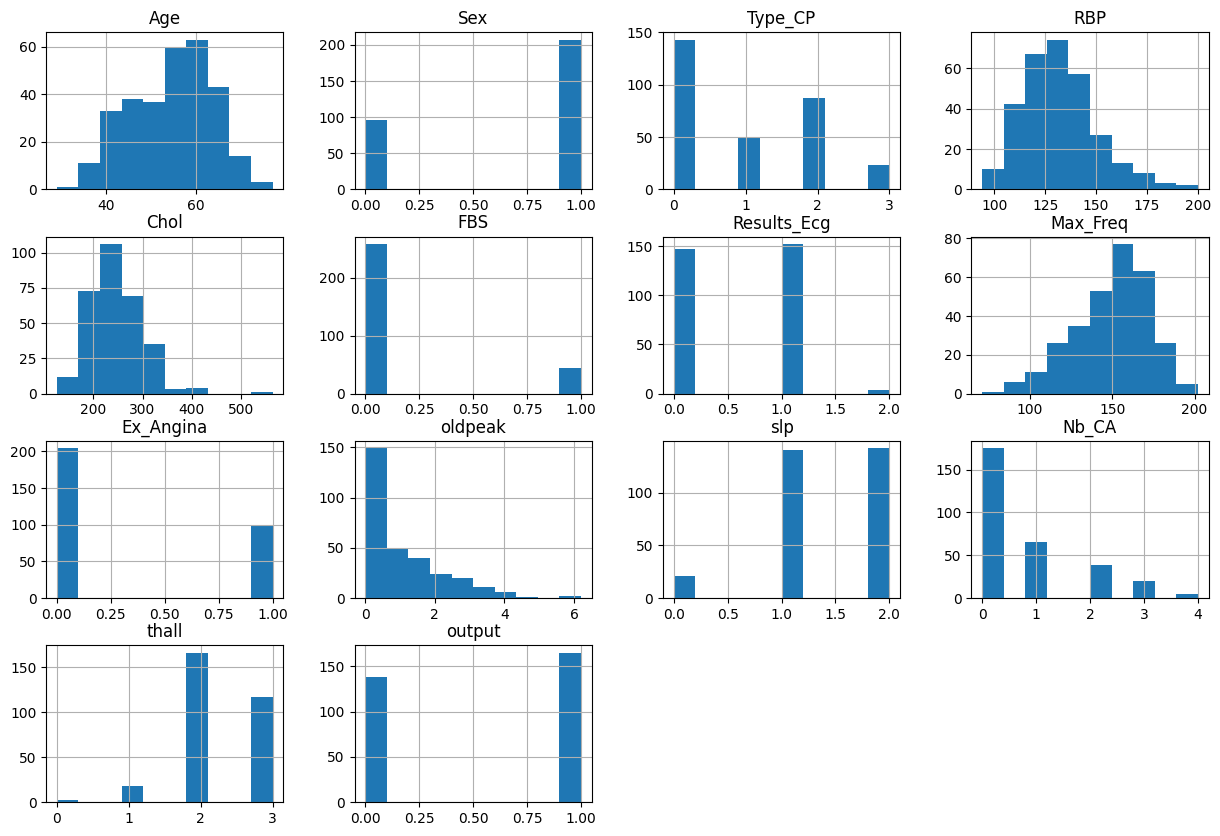

In [16]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

#### 4.2 Gráfico de Densidade

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.


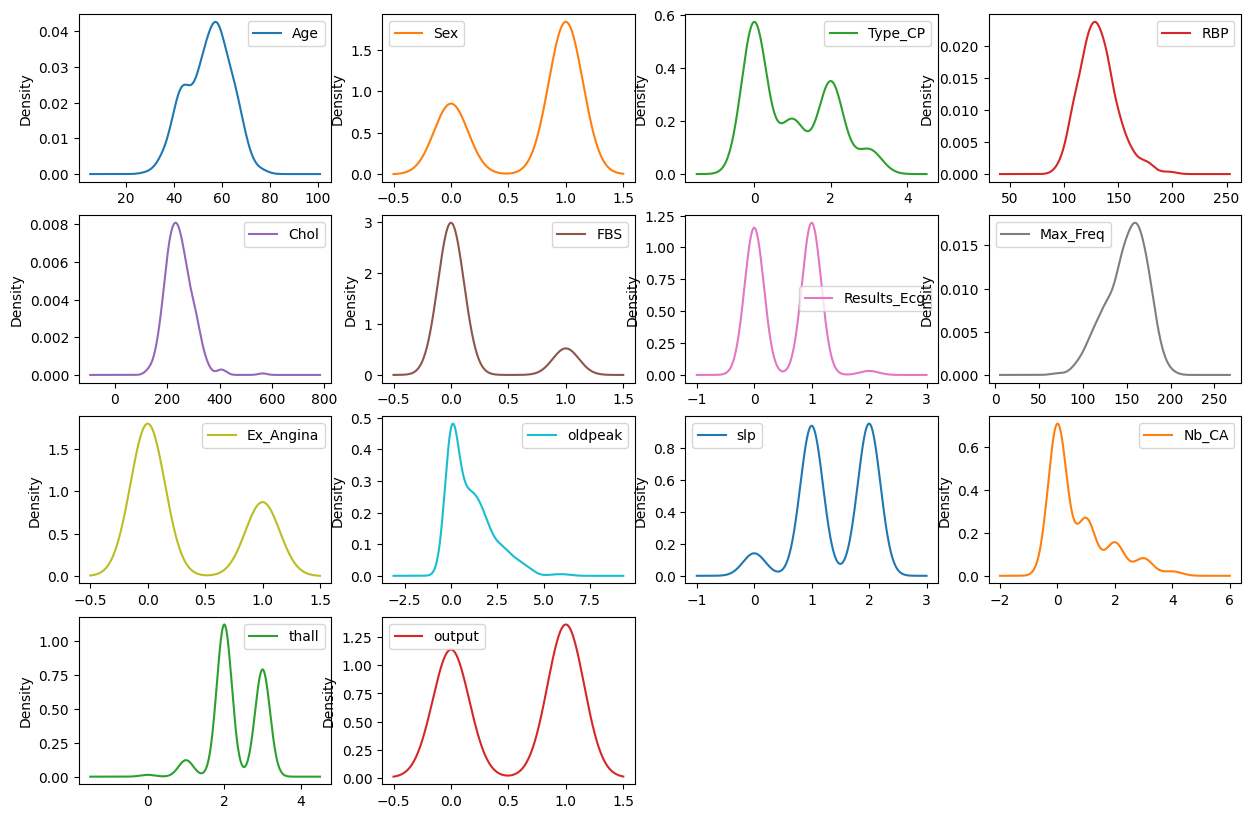

In [33]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

*OBS:* Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

O código a seguir exibe a matriz de correlação.

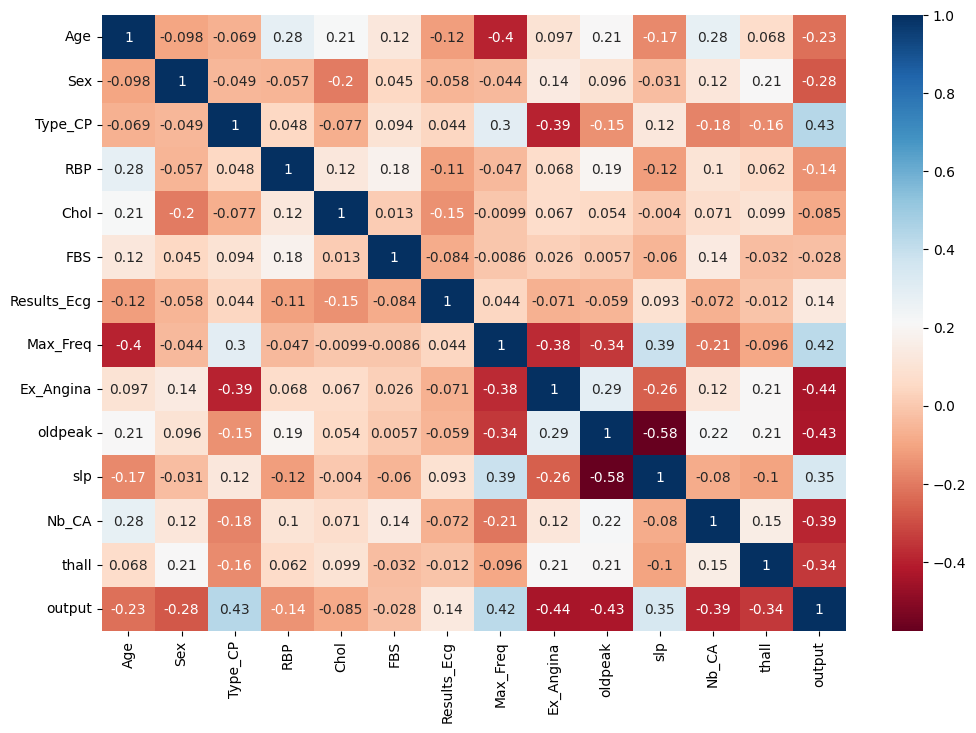

In [29]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário (largura, altura)

# Matriz de Correlação com Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu')

# Exibindo o gráfico
plt.show()

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Abaixo seguem os gráficos de disperção para este caso, no entanto ele não oferece uma interpretação adequada devido a quantidade de variáveis, apesar de que se necessário podemos isolar o gráfico de interesse de modo a entender a relação entre os parâmetros selecionados. Sendo assim, escolheu-se o modelo de visualização anterior (Matriz de correlação), para  entender a relação entre as variáveis e a saída de uma forma mais intuitiva.

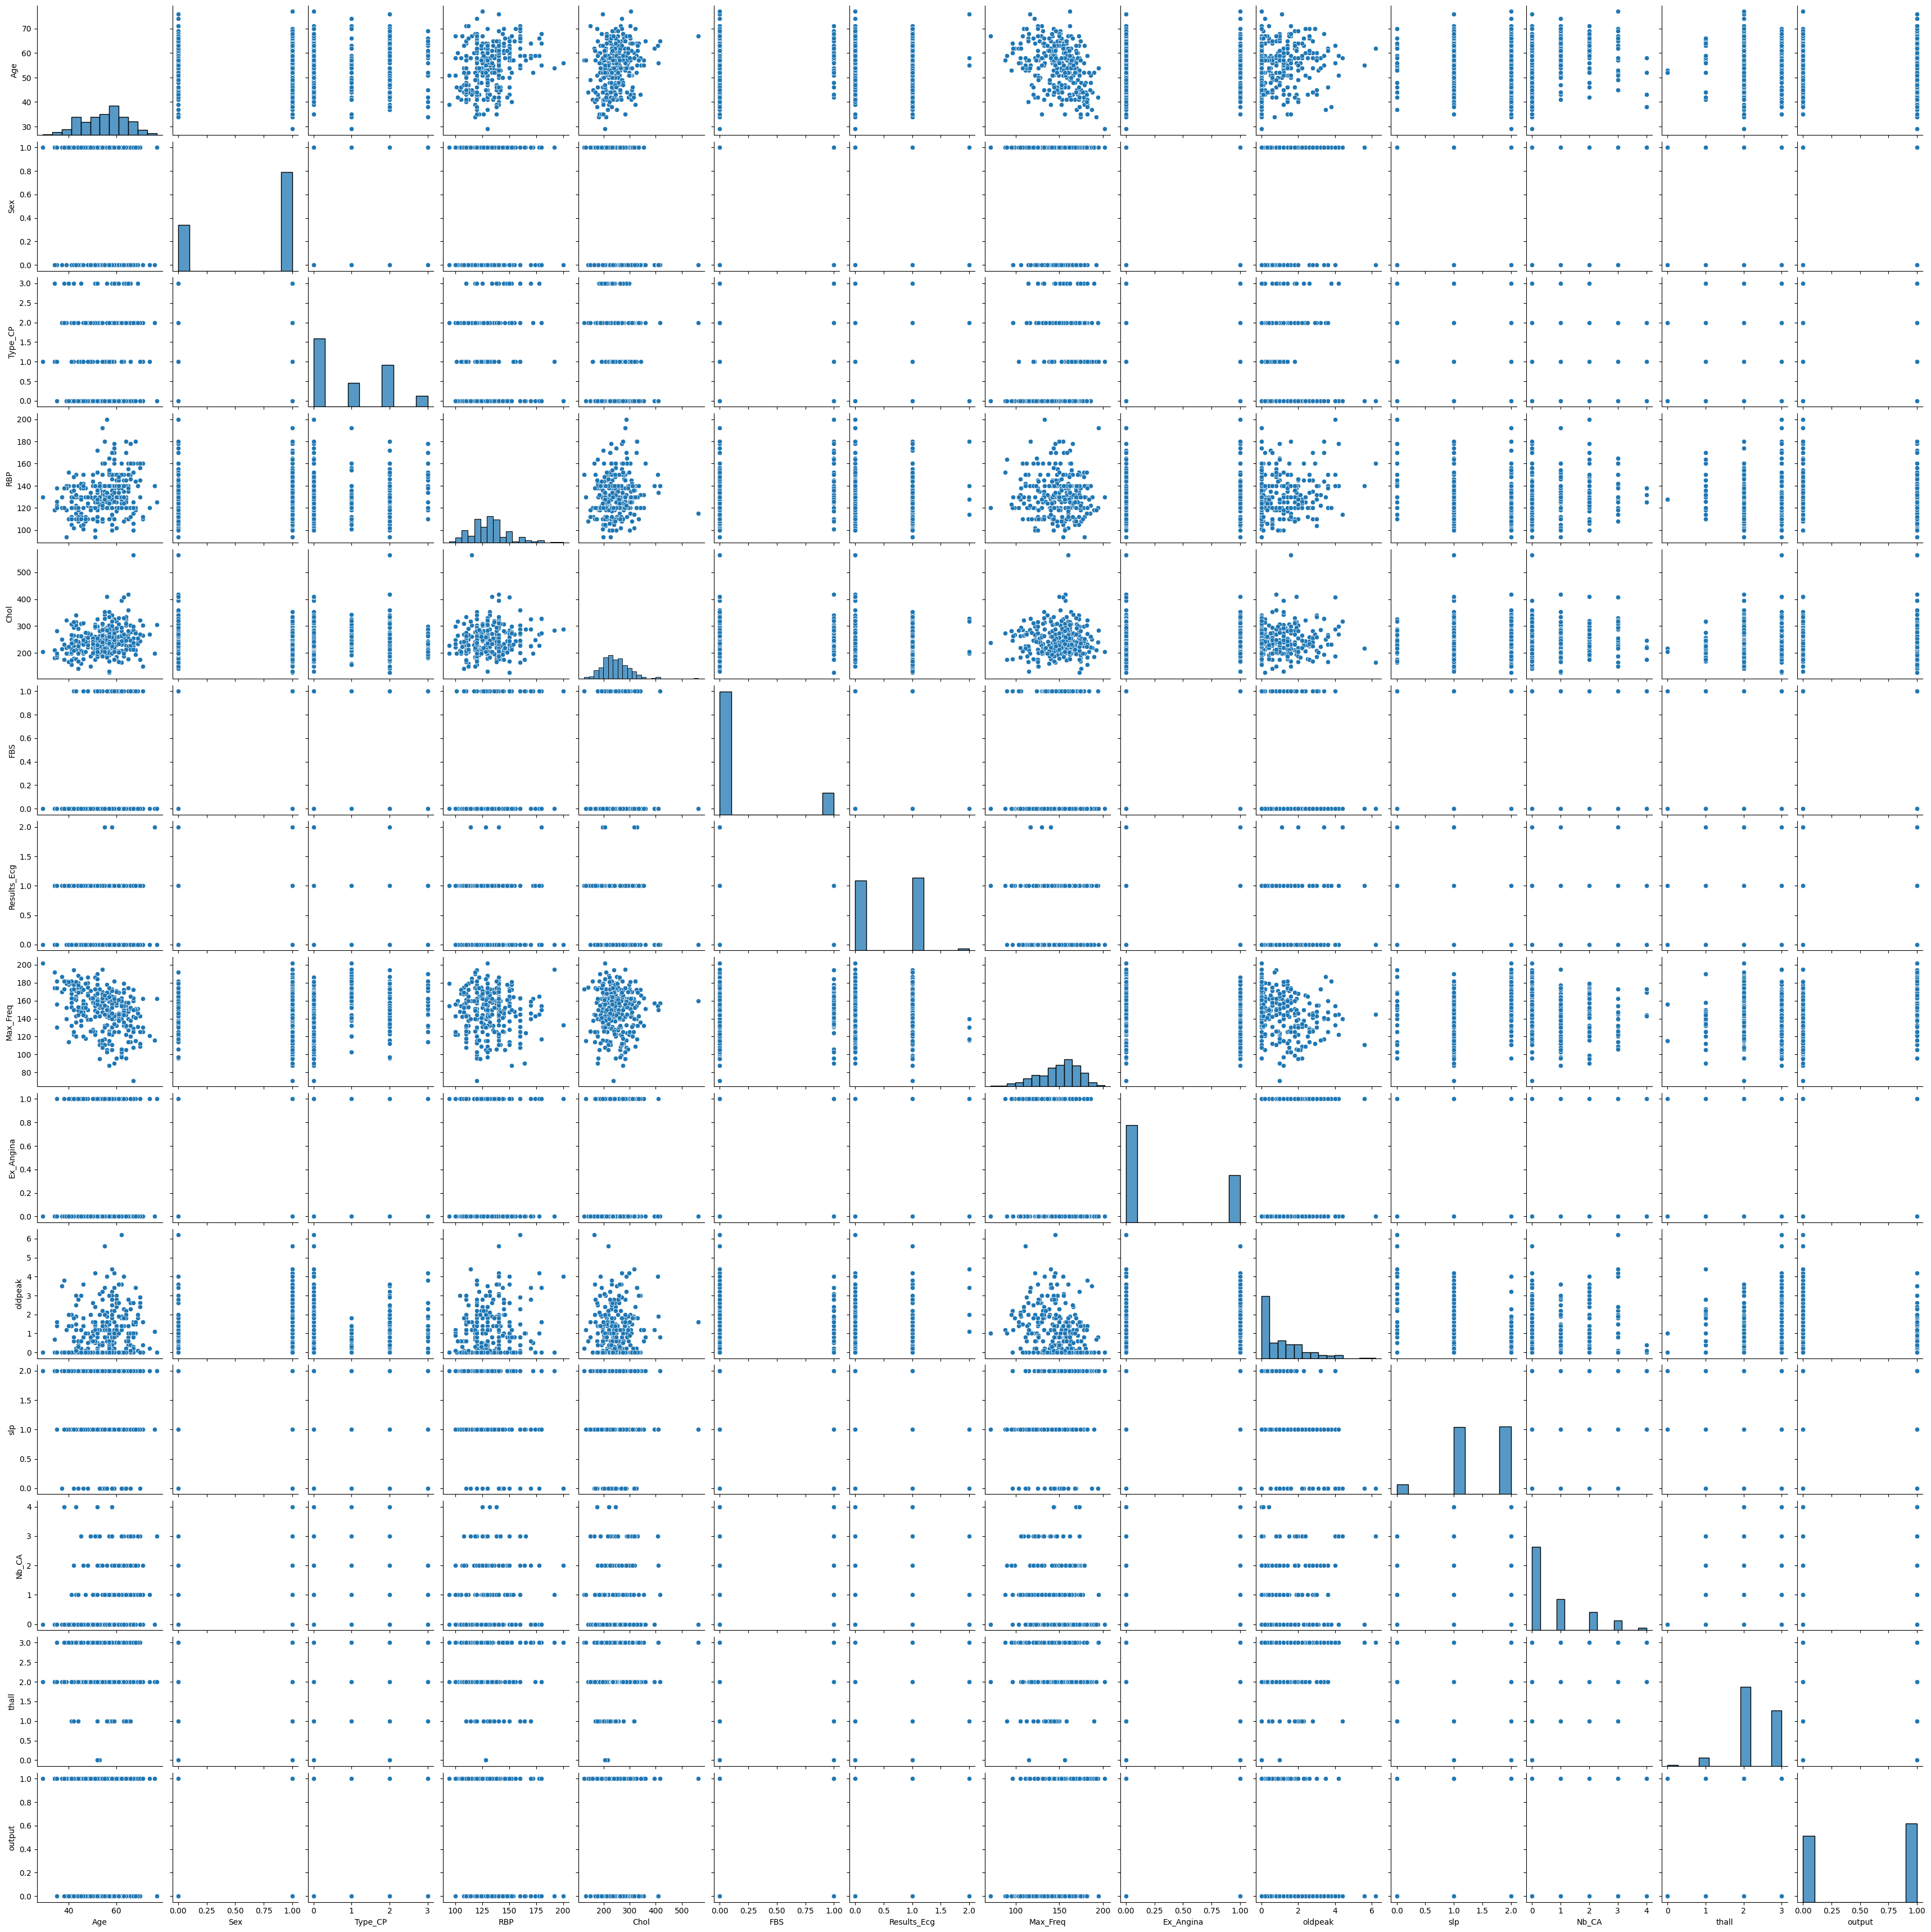

In [34]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

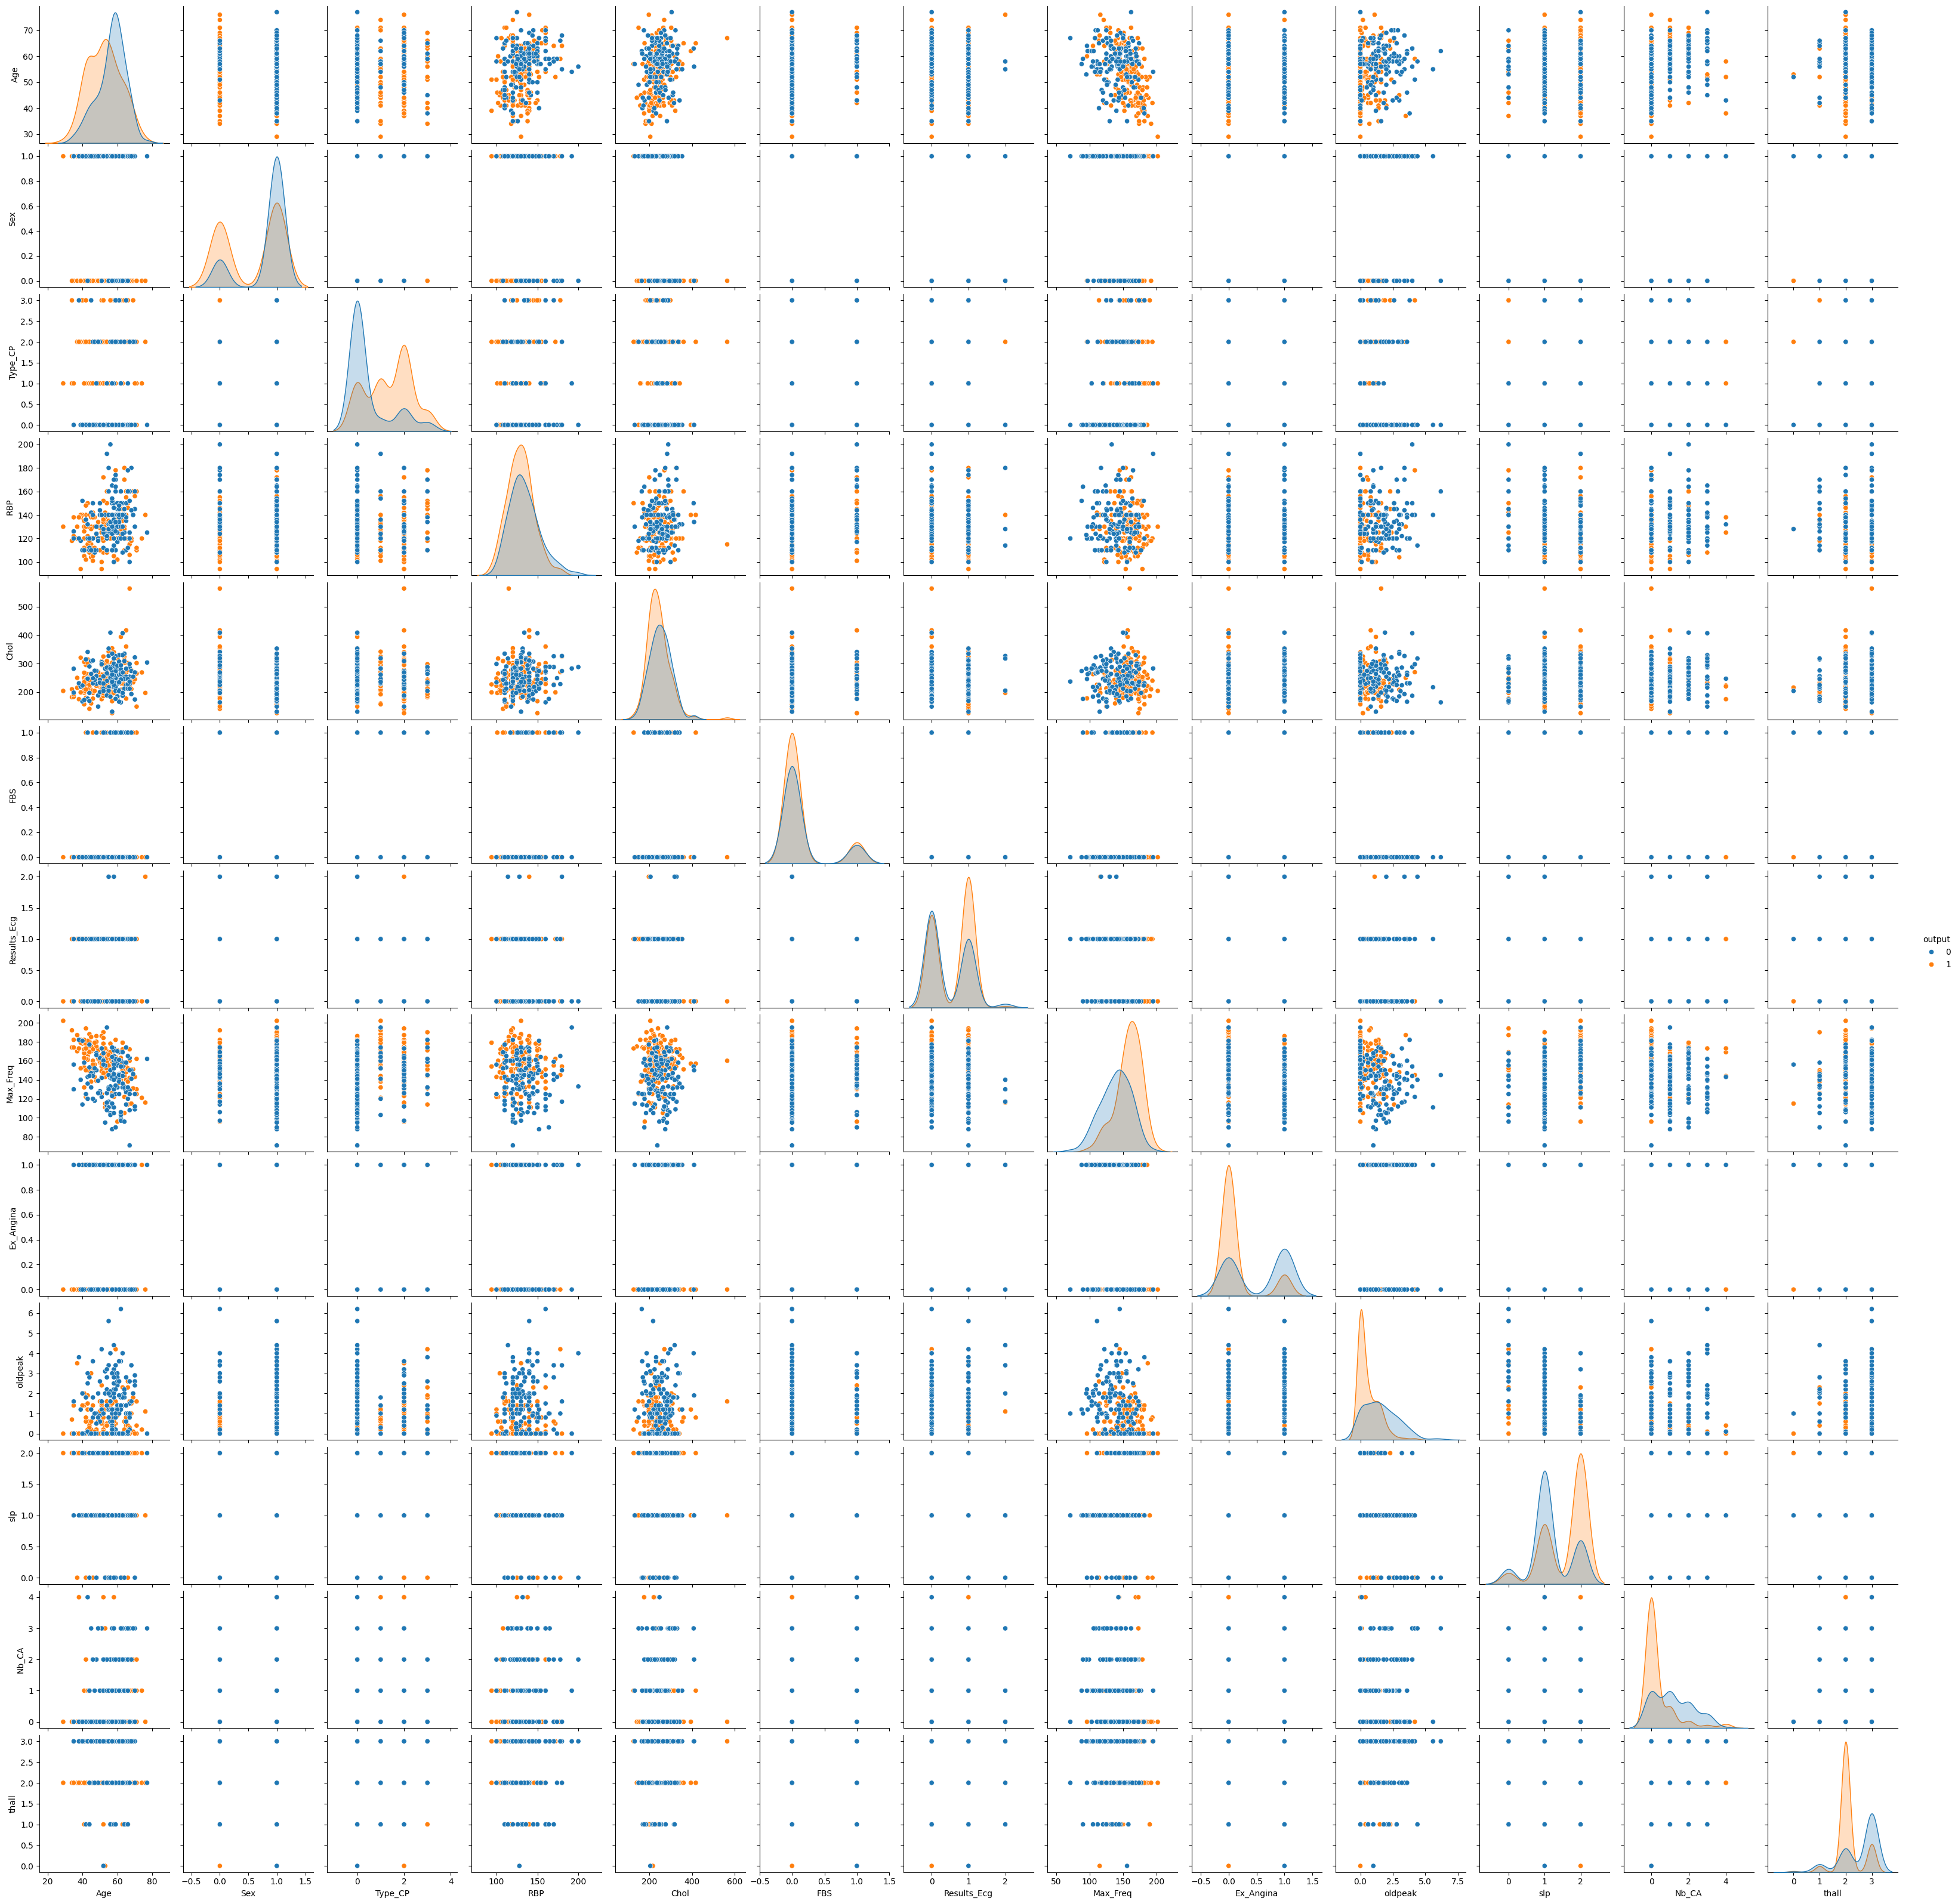

In [36]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "output", height = 2.5);

##5. Conclusão

Utilizando a matriz de correlação como parâmetro para nossa análise, podemos verificar na ultima linha, onde a variável "output" está presente, os fatores que mais contribuem para elevar a chance de ataque cardíaco, segundo os dados utilizados. Como um valor mais próximo de 1 indica uma correlação, ou seja, ele contribui mais para a variável de saída possuir valor verdadeiro (output = 1), temos que os parâmetros de, índice de dor torácica, frequência cardíaca máxima alcançada e a inclinação do segmento ST durante o exercício são os fatores que mais contribuem para aumentar a chance de infarto. Da mesma forma, podemos interpretar valores mais próximos à -1 como sendo menos influentes ao aumento do risco, podemos citar a depressão do segmento ST induzida por exercício em relação ao repouso (oldpeak) que indica que durante ou após o exercício físico, (que pode ser um sinal de que o coração não está recebendo sangue e oxigênio adequados durante momentos de esforço). Observe, que todos os fatores possuem algum tipo de influência na variável alvo (output), a visualização multimodal nos permite classificar quais delas impactam mais ou menos no valor final.

Além das correlações em função do risco de infarto, podemos analisar outras características a partir deste gráfico, utilizando outras linhas como referência, como por exemplo, para pacientes do sexo masculino, (sex = 1) há uma menor chance de infarto devido ao índice output estar com valor negativo, ou seja com menor correlação. Isto mostra a relevância de um estudo de classificação e análise de dados pode ajudar a interpretar fatores que contribuam para uma determinada condição (neste caso, uma questão de saúde pública), e estes resultados auxiliem na tomada de decisões para previnir o surgimento de uma condição clínica mais grave para um grupo de risco, ou que possuam determinadas condições genéticas.